# Question 3

In [0]:
import numpy as np
import pandas as pd

In [0]:
###################
# Reading data
###################
train_df = pd.read_csv("/content/drive/My Drive/DS 8004 - Machine Learning 2/Assignments/Assignment 2/train_set.csv")

test_df = pd.read_csv("/content/drive/My Drive/DS 8004 - Machine Learning 2/Assignments/Assignment 2/test_set.csv")

In [0]:
###################
# Exploring data
###################

train_df.head(10)

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,arched,yes,no,no,no,no,no,yes,1,4,round,lac_central,lacunar,stripped,vesicles,yes,yes,5,malign_lymph
1,displaced,yes,no,no,yes,yes,no,yes,1,3,round,lac_central,lacunar,diluted,vesicles,yes,yes,3,malign_lymph
2,arched,no,no,no,no,yes,no,yes,1,2,oval,lac_margin,lac_margin,drop_like,vesicles,no,yes,1,malign_lymph
3,arched,no,no,no,no,no,no,yes,1,2,oval,lac_central,lacunar,faint,vesicles,yes,yes,3,malign_lymph
4,deformed,no,no,no,no,no,no,no,1,2,oval,lac_central,lacunar,faint,chalices,yes,yes,1,malign_lymph
5,deformed,no,no,no,no,no,no,yes,1,4,round,lac_margin,lac_central,diluted,vesicles,yes,yes,3,malign_lymph
6,arched,no,no,no,no,no,no,yes,1,3,oval,lac_central,lacunar,faint,vesicles,yes,yes,4,malign_lymph
7,displaced,no,no,no,no,no,no,yes,1,3,oval,lac_central,lac_central,faint,vesicles,yes,yes,1,malign_lymph
8,deformed,no,no,no,no,yes,no,yes,1,3,round,lac_central,lac_central,coarse,vesicles,no,yes,6,malign_lymph
9,displaced,no,no,no,no,no,no,yes,1,4,oval,lacunar,lac_central,stripped,vesicles,yes,yes,7,malign_lymph


In [0]:
test_df.head(10)

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,class
0,displaced,no,no,no,no,yes,no,yes,1,4,oval,lacunar,lac_central,stripped,vesicles,yes,yes,2,malign_lymph
1,arched,no,no,no,no,yes,no,yes,1,2,oval,lacunar,lac_central,faint,no,yes,yes,2,malign_lymph
2,displaced,yes,yes,yes,yes,yes,yes,yes,1,4,round,lac_central,lac_central,stripped,vesicles,yes,yes,8,malign_lymph
3,displaced,yes,yes,no,yes,yes,no,yes,1,1,oval,lacunar,no,drop_like,no,yes,yes,2,malign_lymph
4,deformed,no,no,no,no,yes,no,yes,1,2,oval,lac_central,lac_margin,faint,chalices,yes,yes,1,malign_lymph
5,deformed,no,no,no,no,no,no,yes,1,2,oval,lac_central,lacunar,coarse,vesicles,yes,yes,3,malign_lymph
6,arched,yes,no,no,no,yes,no,yes,1,3,round,lac_central,lacunar,faint,vesicles,yes,yes,2,malign_lymph
7,displaced,no,no,no,yes,no,yes,yes,1,3,oval,lac_margin,lac_central,diluted,vesicles,yes,yes,7,malign_lymph
8,arched,no,no,no,no,no,no,yes,1,3,oval,lacunar,lacunar,faint,vesicles,yes,yes,5,malign_lymph
9,displaced,no,no,no,no,yes,no,yes,1,4,round,lac_central,lac_margin,drop_like,vesicles,yes,yes,5,malign_lymph


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
lymphatics         100 non-null object
block_of_affere    100 non-null object
bl_of_lymph_c      100 non-null object
bl_of_lymph_s      100 non-null object
by_pass            100 non-null object
extravasates       100 non-null object
regeneration_of    100 non-null object
early_uptake_in    100 non-null object
lym_nodes_dimin    100 non-null int64
lym_nodes_enlar    100 non-null int64
changes_in_lym     100 non-null object
defect_in_node     100 non-null object
changes_in_node    100 non-null object
changes_in_stru    100 non-null object
special_forms      100 non-null object
dislocation_of     100 non-null object
exclusion_of_no    100 non-null object
no_of_nodes_in     100 non-null int64
class              100 non-null object
dtypes: int64(3), object(16)
memory usage: 15.0+ KB


In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
lymphatics         42 non-null object
block_of_affere    42 non-null object
bl_of_lymph_c      42 non-null object
bl_of_lymph_s      42 non-null object
by_pass            42 non-null object
extravasates       42 non-null object
regeneration_of    42 non-null object
early_uptake_in    42 non-null object
lym_nodes_dimin    42 non-null int64
lym_nodes_enlar    42 non-null int64
changes_in_lym     42 non-null object
defect_in_node     42 non-null object
changes_in_node    42 non-null object
changes_in_stru    42 non-null object
special_forms      42 non-null object
dislocation_of     42 non-null object
exclusion_of_no    42 non-null object
no_of_nodes_in     42 non-null int64
class              42 non-null object
dtypes: int64(3), object(16)
memory usage: 6.4+ KB


In [0]:
# changing numerical values to object values - since they are 
# actually categorical variables and are not numerical
train_df.lym_nodes_dimin = train_df.lym_nodes_dimin.astype('object')
train_df.lym_nodes_enlar = train_df.lym_nodes_enlar.astype('object')
train_df.no_of_nodes_in = train_df.no_of_nodes_in.astype('object')

test_df.lym_nodes_dimin = test_df.lym_nodes_dimin.astype('object')
test_df.lym_nodes_enlar = test_df.lym_nodes_enlar.astype('object')
test_df.no_of_nodes_in = test_df.no_of_nodes_in.astype('object')

In [0]:
train_df.columns.values

array(['lymphatics', 'block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s',
       'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in',
       'lym_nodes_dimin', 'lym_nodes_enlar', 'changes_in_lym',
       'defect_in_node', 'changes_in_node', 'changes_in_stru',
       'special_forms', 'dislocation_of', 'exclusion_of_no',
       'no_of_nodes_in', 'class'], dtype=object)

In [0]:
###############################
# Naive bayes solution from
# tutorial 6 adapted to the 
# assignment problem
###############################

def Naive_Bayes (X, Y, X_test, Y_test, frac_perc):
    import numpy as np
    import pandas as pd

    #####################################
    # need to merge X and Y back together
    # in order to sample  for second part 
    # of this question, otherwise the 
    # algorithm will break when you try to 
    # sub-sample.
    ######################################
    merge_XY =  pd.concat([X, Y], axis=1)
    merge_XY = merge_XY.sample(frac = frac_perc)

    Y = merge_XY.iloc[:,18]
    X_frac = merge_XY.iloc[:,0:18]

    Y_prob = {}
    Y_count = {}
    Y_unique = np.unique(Y)
    Y_len = len(Y)

    for C in range(len(Y_unique)):
        Y_prob[Y_unique[C]] = (sum (Y == Y_unique[C])) / (Y_len)
        Y_count[Y_unique[C]] = (sum (Y == Y_unique[C]))
    
    

    prob_table = {}
    for no_feature in range(X.shape[1]):
        s = 'Column_{}'.format(X.columns.values[no_feature])
        if (X.iloc[:,no_feature].dtypes != 'float64'):# categorical
            X_unique = np.unique(X.iloc[:,no_feature])
            prob_table [s] = pd.DataFrame(0.00, index= X_unique, columns= Y_unique) #create empty dataframe
            for i in range(len(X_unique)):
                for j in range(len(Y_unique)):
                  ##########################################################
                  # added a one to the numerator here for laplace smoothing
                  # and divded by the total number of unique X values for a
                  # feature.
                  ##########################################################
                  prob_table [s].iloc[i,j] = (sum(X_frac[Y==Y_unique[j]].iloc[:,no_feature] == X_unique[i])+1) / (Y_count[Y_unique[j]]+ len(X_unique))
    # prediction
    test_nrow = X_test.shape [0]
    test_ncol = X_test.shape [1]
    # creating an empty dataframe for prediction
    ##               +     -   Final_Pred
    ## instance1   #.##  #.##    + or -
    ## instance2   #.##  #.##    + or -
    ## ...
    pred_table = pd.DataFrame(0.00, index= range(len(X_test)), columns= np.append(Y_unique,"Final_pred")) 
    pred_table["Final_pred"] = pred_table["Final_pred"].astype(Y.dtypes) # same type as output
    for i in range(test_nrow):
        pred = {}
        first_time = True
        for j in range(test_ncol):
            if (X.iloc[:,j].dtypes != 'float64'):# categorical
                s = 'Column_{}'.format(X_test.columns.values[j])
                for C in range(len(Y_unique)):
                    temp = prob_table[s].loc[X_test.iloc[i,j]][C]
                    if first_time: 
                        pred[C] = temp
                    else:
                        pred[C] = pred[C] * temp
                first_time = False
            
            ######################################
            # Since this dataset does not contain
            # numerical data I did not update
            # this part of the codebase.
            ######################################
            else: #numerical
                for C in range(len(Y_unique)):
                    filtered = X[Y==Y_unique[C]].iloc[:,j]
                    mean_filtered = np.mean(filtered)
                    var_filtered = np.std(filtered)**2
                    temp = 1 / (2*np.pi*var_filtered)**(0.5) * np.exp ( - (X_test.iloc[i,j] - mean_filtered)**2 / 
                                                                      (2*var_filtered)  )
                    if first_time: 
                        pred [C] = temp
                    else:
                        pred [C] = pred[C] * temp
                first_time = False
                    

        for C in range(len(Y_unique)):
            pred[C] = pred[C] * Y_prob[Y_unique[C]]
        denom = sum(pred.values())
        for C in range(len(Y_unique)):
            pred[C] = pred[C] / denom
    
        for C in range(len(Y_unique)):
            pred_table.iloc[i,C] = round(pred[C],3)
            
        pred_table.iloc[i, pred_table.columns.get_loc("Final_pred")] = pred_table.iloc[i,0:2].astype('float64').idxmax()
        
    pred_table["True_labels"] = Y_test
    output = {}
    output["prob_table"] = prob_table
    output["pred"] = pred_table
    
    accuracy = sum(pred_table["Final_pred"] == Y_test) / len(Y_test)
    print("accuracy =", round(accuracy,3))
    return (list([output,accuracy,sum(pred_table['Final_pred'] == Y_test)]))

In [0]:
############################################################
# Need to create train and test feature and label dataframes
############################################################ 
train_df_features = train_df.iloc[:,0:18]
train_df_labels = train_df.iloc[:,18]

test_df_features = test_df.iloc[:,0:18]
test_df_labels = test_df.iloc[:,18]

In [0]:
####################################################
# Running naive bayes model with train and test data
####################################################

nb_model = Naive_Bayes(train_df_features,train_df_labels,test_df_features,test_df_labels,frac_perc = 1)

accuracy = 0.857


In [0]:
##############################################################################
# The model clearly outputs: 1) The predicted class, 2) the actual class, and
# 3) the posterior probability of the predicted class as well as the 
# total number of test cases correctly classified
##############################################################################

nb_model

[{'pred':     malign_lymph  metastases    Final_pred   True_labels
  0          1.000       0.000  malign_lymph  malign_lymph
  1          0.965       0.035  malign_lymph  malign_lymph
  2          0.999       0.001  malign_lymph  malign_lymph
  3          0.025       0.975    metastases  malign_lymph
  4          0.121       0.879    metastases  malign_lymph
  5          0.943       0.057  malign_lymph  malign_lymph
  6          0.880       0.120  malign_lymph  malign_lymph
  7          0.999       0.001  malign_lymph  malign_lymph
  8          0.999       0.001  malign_lymph  malign_lymph
  9          0.992       0.008  malign_lymph  malign_lymph
  10         0.003       0.997    metastases  malign_lymph
  11         0.118       0.882    metastases  malign_lymph
  12         0.989       0.011  malign_lymph  malign_lymph
  13         0.998       0.002  malign_lymph  malign_lymph
  14         0.747       0.253  malign_lymph  malign_lymph
  15         0.996       0.004  malign_lymph  ma

In [0]:
#######################################
# Testing correctness of the above code
#######################################
import matplotlib.pyplot as plt
# Plotting learning curve of Naive Bayes algorithm for sample sizes
# of 25, 50, and 100
#https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)

# Average for sample size of 25, 50 , and 100
nb_model_25_acc = list()
nb_model_50_acc = list()
nb_model_100_acc = list()
for i in range(0,4):
  nb_model_25 = Naive_Bayes(train_df_features,train_df_labels,test_df_features,test_df_labels,frac_perc=.25)
  nb_model_25_acc.append(nb_model_25[1])

  nb_model_50 = Naive_Bayes(train_df_features,train_df_labels,test_df_features,test_df_labels,frac_perc=.50)
  nb_model_50_acc.append(nb_model_50[1])

  nb_model_100 = Naive_Bayes(train_df_features,train_df_labels,test_df_features,test_df_labels,frac_perc= 1)
  nb_model_100_acc.append(nb_model_100[1])

nb_model_25_acc = np.array(nb_model_25_acc)
nb_model_50_acc = np.array(nb_model_50_acc)
nb_model_100_acc = np.array(nb_model_100_acc)

accuracy = 0.857
accuracy = 0.857
accuracy = 0.857
accuracy = 0.881
accuracy = 0.833
accuracy = 0.857
accuracy = 0.81
accuracy = 0.833
accuracy = 0.857
accuracy = 0.786
accuracy = 0.857
accuracy = 0.857


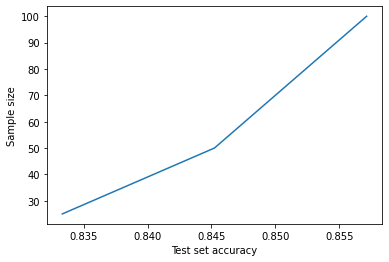

In [0]:
# plotting the results 
nb_model_mean = np.array([nb_model_25_acc.mean(),nb_model_50_acc.mean(),nb_model_100_acc.mean()])
y = [25,50,100]
plt.plot(nb_model_mean,y)
plt.xlabel('Test set accuracy')
plt.ylabel('Sample size')
plt.show()

In [0]:
##########################################
# Comparing results against naive bayes
# implementation in scikit learn
##########################################

# Turns out scikit learn needs everything to be a float in order for this
# to work properly so we need to pre-process the data into integer values,
# I think.

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
for i in range(0,19):
  train_df.iloc[:,i] = labelencoder.fit_transform(train_df.iloc[:,i])


In [0]:
for i in range(0,19):
   test_df.iloc[:,i] = labelencoder.fit_transform(test_df.iloc[:,i])

In [0]:
train_df_features = train_df.iloc[:,0:18]
train_df_labels = train_df.iloc[:,18]

test_df_features = test_df.iloc[:,0:18]
test_df_labels = test_df.iloc[:,18]

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_df_features, train_df_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
test_pred = clf.predict(test_df_features)

In [0]:

print("Sklearn test set accuracy:",np.round(sum(test_pred == test_df_labels) / len(test_df_labels),3),
      "\nNaive bayes implementation model accuracy from above:",np.round(nb_model_100_acc.mean(),3) )

Sklearn test set accuracy: 0.881 
Naive bayes implementation model accuracy from above: 0.857
